# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Advanced Deep Learning
## Topic   : Object Localization

#### Downlad the dataset

In [1]:
#Download both images and annotations
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [2]:
#Check current directory to make sure data is downloaded
!ls -l

total 792092
-rw-r--r-- 1 root root  19173078 Jun 30  2012 annotations.tar.gz
-rw-r--r-- 1 root root 791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root      4096 May  6 13:44 sample_data


In [3]:
#unzip the tar files downloaded abve
!tar xf images.tar.gz
!tar xf annotations.tar.gz

In [4]:
#Explore directories
!ls -l

total 792408
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
drwxr-xr-x 2 1001  1001    319488 Jun 18  2012 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 May  6 13:44 sample_data


In [8]:
#Check the xml annotations
!ls -l annotations/xmls | wc -l

3687


In [9]:
#Install tidy to review xml files
!sudo apt-get install tidy --quiet

Reading package lists...
Building dependency tree...
Reading state information...
tidy is already the newest version (1:5.2.0-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [10]:
#Check one of the xml file to understand annotations
!tidy -xml -i annotations/xmls/wheaten_terrier_170.xml

No warnings or errors were found.

<annotation>
  <folder>OXIIIT</folder>
  <filename>wheaten_terrier_170.jpg</filename>
  <source>
    <database>OXFORD-IIIT Pet Dataset</database>
    <annotation>OXIIIT</annotation>
    <image>flickr</image>
  </source>
  <size>
    <width>500</width>
    <height>330</height>
    <depth>3</depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>dog</name>
    <pose>Frontal</pose>
    <truncated>0</truncated>
    <occluded>0</occluded>
    <bndbox>
      <xmin>181</xmin>
      <ymin>126</ymin>
      <xmax>299</xmax>
      <ymax>239</ymax>
    </bndbox>
    <difficult>0</difficult>
  </object>
</annotation>

About HTML Tidy: https://github.com/htacg/tidy-html5
Bug reports and comments: https://github.com/htacg/tidy-html5/issues
Official mailing list: https://lists.w3.org/Archives/Public/public-htacg/
Latest HTML specification: http://dev.w3.org/html5/spec-author-view/
Validate your HTML documents: http://validator.w3.org/nu/
Lobby your company 

#### Convert XML to CSV

In [11]:
#Move all xml files to images folder, this is needed for python script used next
!mv annotations/xmls/* images/

In [12]:
#Mount Google drive (change code for local machine). We need to copy generate_dataset.py script to current directory
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
#Copy generate_dataset.py file to current directory
!cp "/gdrive/My Drive/Advanced Computer Vision AIML/Localization/generate_dataset.py" .

In [14]:
!ls -l

total 792536
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
-rw------- 1 root root       3344 May 23 17:03 generate_dataset.py
drwxr-xr-x 2 1001  1001    446464 May 23 17:02 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 May  6 13:44 sample_data


In [15]:
#Build csv file for both training and test dataset
!python generate_dataset.py

class yorkshire_terrier: 100 images
class sphynx: 100 images
class scottish_terrier: 100 images
class russian_blue: 100 images
class great_pyrenees: 100 images
class persian: 100 images
class egyptian_mau: 92 images
class basset_hound: 100 images
class leonberger: 100 images
class pomeranian: 100 images
class british_shorthair: 100 images
class saint_bernard: 99 images
class japanese_chin: 100 images
class bombay: 100 images
class havanese: 100 images
class keeshond: 100 images
class chihuahua: 100 images
class newfoundland: 100 images
class siamese: 100 images
class ragdoll: 99 images
class miniature_pinscher: 100 images
class beagle: 100 images
class english_setter: 100 images
class staffordshire_bull_terrier: 100 images
class american_bulldog: 100 images
class samoyed: 99 images
class german_shorthaired: 100 images
class abyssinian: 99 images
class pug: 100 images
class shiba_inu: 100 images
class english_cocker_spaniel: 100 images
class wheaten_terrier: 100 images
class boxer: 100 

In [16]:
!ls -l

total 792780
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
-rw------- 1 root root       3344 May 23 17:03 generate_dataset.py
drwxr-xr-x 2 1001  1001    446464 May 23 17:02 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 May  6 13:44 sample_data
-rw-r--r-- 1 root root     198661 May 23 17:03 train.csv
-rw-r--r-- 1 root root      46711 May 23 17:03 validation.csv


#### Visualize Data

In [17]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [18]:
#Read csv file as pandas dataframe, csv file has no header
train_df = pd.read_csv('train.csv', header=None, 
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

In [19]:
print(train_df.shape)
train_df.head()

(2984, 9)


,File,Height,Width,xmin,ymin,xmax,ymax,Class,Label
0,images/yorkshire_terrier_131.jpg,191,300,54,1,195,94,yorkshire_terrier,0
1,images/yorkshire_terrier_150.jpg,199,300,110,47,173,99,yorkshire_terrier,0
2,images/yorkshire_terrier_158.jpg,225,300,80,4,251,121,yorkshire_terrier,0
3,images/yorkshire_terrier_145.jpg,225,300,72,4,184,164,yorkshire_terrier,0
4,images/yorkshire_terrier_153.jpg,183,300,168,1,281,151,yorkshire_terrier,0


In [20]:
#Create a dictionary to hold label and corresponding class name
num_classes = train_df['Label'].unique()
label_class_dict = dict(zip(train_df['Label'], train_df['Class']))
#label_class_dict

In [21]:
num_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [22]:
label_class_dict

{0: 'yorkshire_terrier',
 1: 'sphynx',
 2: 'scottish_terrier',
 3: 'russian_blue',
 4: 'great_pyrenees',
 5: 'persian',
 6: 'egyptian_mau',
 7: 'basset_hound',
 8: 'leonberger',
 9: 'pomeranian',
 10: 'british_shorthair',
 11: 'saint_bernard',
 12: 'japanese_chin',
 13: 'bombay',
 14: 'havanese',
 15: 'keeshond',
 16: 'chihuahua',
 17: 'newfoundland',
 18: 'siamese',
 19: 'ragdoll',
 20: 'miniature_pinscher',
 21: 'beagle',
 22: 'english_setter',
 23: 'staffordshire_bull_terrier',
 24: 'american_bulldog',
 25: 'samoyed',
 26: 'german_shorthaired',
 27: 'abyssinian',
 28: 'pug',
 29: 'shiba_inu',
 30: 'english_cocker_spaniel',
 31: 'wheaten_terrier',
 32: 'boxer',
 33: 'american_pit_bull_terrier',
 34: 'bengal',
 35: 'maine_coon',
 36: 'birman'}

Show images with bounding box

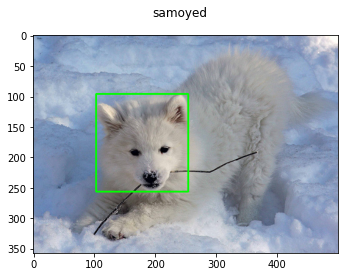

In [27]:
#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])

#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
cv2.rectangle(img, 
             (train_df.loc[img_num, 'xmin'],train_df.loc[img_num, 'ymin']),
             (train_df.loc[img_num, 'xmax'],train_df.loc[img_num, 'ymax']), 
             (0,255,0),
             2)
#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [28]:
#Read the validation csv file
test_df = pd.read_csv('validation.csv', header=None, 
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

In [29]:
train_df.shape, test_df.shape

((2984, 9), (702, 9))

#### Build a Batch Generator

In [30]:
import tensorflow as tf

In [31]:
img_size = 224

In [32]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))
        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Build the Model

Load Pre-Trained Model

In [33]:
tf.keras.backend.clear_session()
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, 3),
                                          weights='imagenet')

94773248/94765736 [==============================] - 2s 0us/step


Freeze all layers of Pre-trained model

In [34]:
len(model.layers)

175

In [35]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [36]:
for layer in model.layers:
    layer.trainable = False
#for layer in model.layers[150:]:
#    layer.trainable = True

In [37]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [38]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

Add layers

In [39]:
#get Output layer of Pre-trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add Dropout
x = tf.keras.layers.Dropout(0.5)(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Batch Norm
x = tf.keras.layers.BatchNormalization()(x)

Build layer for Label output

In [40]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x)

Build layer for bounding box output

In [41]:
#Regression
bbox_output = tf.keras.layers.Dense(4 , 
                                    activation='sigmoid', 
                                    name='reg_op')(x)

Finalize the model

In [42]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [43]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [44]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':7},
                    metrics=['accuracy'])

In [45]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Train the model

In [46]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batch_size=batchsize)

In [ ]:
final_model.fit_generator(train_generator, 
                          epochs=50,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
46/46 [==============================] - 65s 682ms/step - loss: 11.3176 - class_op_loss: 1.6013 - reg_op_loss: 0.1086 - class_op_accuracy: 0.6050 - reg_op_accuracy: 0.3089 - val_loss: 5.8026 - val_class_op_loss: 0.7958 - val_reg_op_loss: 0.2323 - val_class_op_accuracy: 0.7922 - val_reg_op_accuracy: 0.1391
Epoch 2/50
46/46 [==============================] - 29s 645ms/step - loss: 1.6282 - class_op_loss: 0.2225 - reg_op_loss: 0.0704 - class_op_accuracy: 0.9467 - reg_op_accuracy: 0.4137 - val_loss: 3.9496 - val_class_op_loss: 0.5471 - val_reg_op_loss: 0.1196 - val_class_op_accuracy: 0.8547 - val_reg_op_accuracy: 0.2859
Epoch 3/50
46/46 [==============================] - 29s 646ms/step - loss: 0.6037 - class_op_loss: 0.0785 - reg_op_loss: 0.0542 - class_op_accuracy: 0.9826 - reg_op_accuracy: 0.4872 - val_loss: 2.9993 - val_class_op_loss: 0.4196 - val_reg_op_loss: 0.0620 - val_class_op_accuracy: 0.8859 - val_reg_op_accuracy: 0.3672
Epoch 4/50
46/46 [==============================

In [ ]:
final_model.save('pet_dataset_localization.h5')

#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]
    
    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size)) 
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)
    #3. Normalize image data
    input_array = tf.keras.applications.resnet50.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    #Draw actual bounding box
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 2)
    #Draw predicted bounding box
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 2)

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Real Label : miniature_pinscher 
Predicted Label:  miniature_pinscher


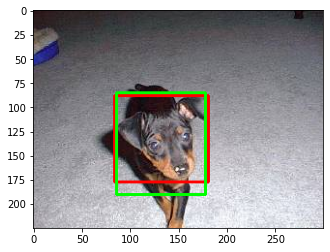

In [ ]:
#Predict on Test Dataset
image_num = np.random.randint(0, test_df.shape[0])
predict_and_draw(image_num, test_df)